# EDA

- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [3]:
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint

from datetime import datetime

from modules.functions_variables import * 

import matplotlib.pyplot as plt
import seaborn as sns

# Self defined functions for EDA
from modules.EDA_Functions import keep_keys, find_drop_keys, parse_json_data


## Data Importing

In [3]:
# loading one file first to see what type of data we are dealing with and what attributes it has
AKJ0 = json.load(open(r'../raw_data/AK_Juneau_0.json','r'))

In [4]:
# Explore json list dictionary keys
print(AKJ0.keys())
print(AKJ0['status'])
print(AKJ0['data'].keys())
print(len(AKJ0['data']['results']))
print(AKJ0['data']['results'][0].keys())

dict_keys(['status', 'data'])
200
dict_keys(['total', 'count', 'results'])
8
dict_keys(['primary_photo', 'last_update_date', 'source', 'tags', 'permalink', 'status', 'list_date', 'open_houses', 'description', 'branding', 'list_price', 'lead_attributes', 'property_id', 'photos', 'flags', 'community', 'products', 'virtual_tours', 'other_listings', 'listing_id', 'price_reduced_amount', 'location', 'matterport'])


In [5]:
# List Dictonary of results
# [
#     {
#         "primary_photo": {
#             "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2867511255s-w1024_h768.jpg"
#         },
#         'last_update_date": "2023-09-19T20:52:50Z",
#         "source": {
#             "plan_id": None,
#             "agents": [
#                 {"office_name": "EXP Realty LLC - Southeast Alaska"},
#                 {"office_name": "Non-Member Office"}
#             ],
#             "spec_id": None,
#             "type": "mls"
#         },
#         "tags": [
#             "carport", "community_outdoor_space", "cul_de_sac", "family_room",
#             "hardwood_floors", "hill_or_mountain_view", "recreation_facilities",
#             "rv_or_boat_parking", "basement", "garage_1_or_more", "two_or_more_stories",
#             "big_yard", "high_ceiling", "efficient", "trails", "shopping"
#         ],
#         "permalink": "9453-Herbert-Pl_Juneau_AK_99801_M90744-30767",
#         "status": "sold",
#         "list_date": "2023-06-29T21:16:25.000000Z",
#         "open_houses": None,
#         "description": {
#             "year_built": 1963,
#             "baths_3qtr": None,
#             "sold_date": "2023-09-18",
#             "sold_price": None,
#             "baths_full": 2,
#             "name": None,
#             "baths_half": None,
#             "lot_sqft": 10454,
#             "sqft": 1821,
#             "baths": 2,
#             "sub_type": None,
#             "baths_1qtr": None,
#             "garage": 1,
#             "stories": None,
#             "beds": 3,
#             "type": "single_family"
#         },
#         "branding": [
#             {
#                 "name": "EXP Realty LLC - Southeast Alaska",
#                 "photo": None,
#                 "type": "Office"
#             }
#         ],
#         "list_price": 554950,
#         "lead_attributes": {
#             "show_contact_an_agent": True
#         },
#         "property_id": "9074430767",
#         "photos": [
#             {
#                 "tags": [
#                     {"label": "house_view", "probability": 0.9931892156601},
#                     {"label": "road_view", "probability": 0.84215885400772},
#                     {"label": "house_view", "probability": 0.93829786777496}
#                 ],
#                 "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2867511255s-w1024_h768.jpg"
#             },
#             {
#                 "tags": [
#                     {"label": "living_room", "probability": 0.99856203794479}
#                 ],
#                 "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2021977128s-w1024_h768.jpg"
#             },
#             {
#                 "tags": [
#                     {"label": "dining_room", "probability": 0.99998116493225}
#                 ],
#                 "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2832281708s-w1024_h768.jpg"
#             },
#             {
#                 "tags": [
#                     {"label": "unknown", "probability": 0.91968685388565}
#                 ],
#                 "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2250208436s-w1024_h768.jpg"
#             },
#             {
#                 "tags": [
#                     {"label": "kitchen", "probability": 0.99999892711639}
#                 ],
#                 "href": "https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m4264543754s-w1024_h768.jpg"
#             }
#         ],
#         "flags": {
#             "is_new_construction": None,
#             "is_for_rent": None,
#             "is_subdivision": None,
#             "is_contingent": None,
#             "is_price_reduced": False,
#             "is_pending": None,
#             "is_foreclosure": None,
#             "is_plan": None,
#             "is_coming_soon": None,
#             "is_new_listing": False
#         },
#         "community": None,
#         "products": {
#             "brand_name": "basic_opt_in"
#         },
#         "virtual_tours": None,
#         "other_listings": {
#             "rdc": [
#                 {"listing_id": "2957241843", "listing_key": None, "status": "sold", "primary": True},
#                 {"listing_id": "2957022863", "listing_key": None, "status": "off_market", "primary": None}
#             ]
#         },
#         "listing_id": "2957241843",
#         "price_reduced_amount": 45000,
#         "location": {
#             "address": {
#                 "postal_code": "99801",
#                 "state": "Alaska",
#                 "coordinate": {"lon": -134.59372, "lat": 58.36395},
#                 "city": "Juneau",
#                 "state_code": "AK",
#                 "line": "9453 Herbert Pl"
#             },
#             "street_view_url": "https://maps.googleapis.com/maps/api/streetview?channel=rdc-streetview&client=gme-movesalesinc&location=9453%20Herbert%20Pl%2C%20Juneau%2C%20AK%2099801&size=640x480&source=outdoor&signature=OPv224SjFIJWgVKAXZKZXNYEdNQ=",
#             "county": {"fips_code": None, "name": "Juneau"}
#         },
#         "matterport": False
#     }
# ]


In [6]:
# Working with data frame for one file
from pandas import json_normalize
df = json_normalize(AKJ0['data']['results'])

In [7]:
print(f'There are {len(df.columns)} total keys in the AK_Juneau_0.json file\n')
print(df.columns)

There are 64 total keys in the AK_Juneau_0.json file

Index(['last_update_date', 'tags', 'permalink', 'status', 'list_date',
       'open_houses', 'branding', 'list_price', 'property_id', 'photos',
       'community', 'virtual_tours', 'listing_id', 'price_reduced_amount',
       'matterport', 'primary_photo.href', 'source.plan_id', 'source.agents',
       'source.spec_id', 'source.type', 'description.year_built',
       'description.baths_3qtr', 'description.sold_date',
       'description.sold_price', 'description.baths_full', 'description.name',
       'description.baths_half', 'description.lot_sqft', 'description.sqft',
       'description.baths', 'description.sub_type', 'description.baths_1qtr',
       'description.garage', 'description.stories', 'description.beds',
       'description.type', 'lead_attributes.show_contact_an_agent',
       'flags.is_new_construction', 'flags.is_for_rent',
       'flags.is_subdivision', 'flags.is_contingent', 'flags.is_price_reduced',
       'flags.

In [8]:
# Running self defined functions for one file
keepKeys = keep_keys()

df = parse_json_data(AKJ0['data']['results'],keepKeys)

df.head()

,tags,status,list_date,open_houses,list_price,property_id,listing_id,price_reduced_amount,description.year_built,description.baths_3qtr,...,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line
0,"[carport, community_outdoor_space, cul_de_sac,...",sold,2023-06-29T21:16:25.000000Z,None,554950.0,9074430767,2957241843,45000.0,1963.0,None,...,None,None,False,99801,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl
1,None,sold,None,None,NaN,9424983842,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd
2,None,sold,None,None,NaN,9479068516,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy
3,None,sold,None,None,NaN,9879331943,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd
4,None,sold,None,None,NaN,9521639574,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr


In [2]:
# loop over all files and put them into a dataframe
directory = r'../raw_data'

keepKeys = keep_keys()
housingData = pd.DataFrame(columns=keepKeys)

for file in os.listdir(directory):
    if file != '.gitkeep':
        result = json.load(open(rf'{directory}/{file}'))

        df = parse_json_data(result['data']['results'],keepKeys)
        housingData = pd.concat([housingData,df],ignore_index=True)

C:\Users\kool3\AppData\Local\Temp\ipykernel_4684\113542993.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  housingData = pd.concat([housingData,df],ignore_index=True)
C:\Users\kool3\AppData\Local\Temp\ipykernel_4684\113542993.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  housingData = pd.concat([housingData,df],ignore_index=True)
C:\Users\kool3\AppData\Local\Temp\ipykernel_4684\113542993.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is dep

In [10]:
housingData.head()

,tags,status,list_date,open_houses,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,...,flags.is_new_listing,listing_id,price_reduced_amount,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line
0,"[central_air, dishwasher, fireplace, forced_ai...",sold,2023-11-27T05:15:07.000000Z,None,2001.0,NaN,2024-01-16,345000,2.0,None,...,False,2961973062,NaN,17110,Pennsylvania,-76.865096,40.316612,Harrisburg,PA,1869 Pebble Ct
1,"[disability_features, basement, garage_1_or_mo...",sold,2023-11-23T11:38:45.000000Z,None,1900.0,NaN,2024-01-16,196000,NaN,None,...,False,2961936671,NaN,17110,Pennsylvania,-76.900123,40.296987,Harrisburg,PA,3100 N 3rd St
2,"[carport, central_air, dishwasher, fireplace, ...",sold,2023-12-16T02:39:18.000000Z,None,1971.0,NaN,2024-01-12,205000,2.0,None,...,False,2962590916,NaN,17111,Pennsylvania,-76.757031,40.257449,Harrisburg,PA,7551 Davids Rd
3,"[central_air, dining_room, disability_features...",sold,2023-10-24T14:15:02.000000Z,None,2013.0,NaN,2024-01-12,295000,2.0,None,...,False,2960823390,NaN,17112,Pennsylvania,-76.821034,40.350224,Harrisburg,PA,2722 Bur Ct
4,"[dining_room, hardwood_floors, basement]",sold,2023-11-15T17:43:35.000000Z,None,1900.0,NaN,2024-01-12,106000,NaN,None,...,False,2961699518,NaN,17104,Pennsylvania,-76.869911,40.259374,Harrisburg,PA,404 Crescent St


In [3]:
# Save dataframe to csv
housingData.to_csv('../data/housingDataRaw.csv',index=False)

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [4]:
# load and concatenate data here
# drop or replace values as necessary
housingData = pd.read_csv('../data/housingDataRaw.csv')

In [5]:
housingData.head()

,tags,status,list_date,open_houses,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,...,flags.is_new_listing,listing_id,price_reduced_amount,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line
0,"['central_air', 'dishwasher', 'fireplace', 'fo...",sold,2023-11-27T05:15:07.000000Z,NaN,2001.0,NaN,2024-01-16,345000.0,2.0,NaN,...,False,2.961973e+09,NaN,17110.0,Pennsylvania,-76.865096,40.316612,Harrisburg,PA,1869 Pebble Ct
1,"['disability_features', 'basement', 'garage_1_...",sold,2023-11-23T11:38:45.000000Z,NaN,1900.0,NaN,2024-01-16,196000.0,NaN,NaN,...,False,2.961937e+09,NaN,17110.0,Pennsylvania,-76.900123,40.296987,Harrisburg,PA,3100 N 3rd St
2,"['carport', 'central_air', 'dishwasher', 'fire...",sold,2023-12-16T02:39:18.000000Z,NaN,1971.0,NaN,2024-01-12,205000.0,2.0,NaN,...,False,2.962591e+09,NaN,17111.0,Pennsylvania,-76.757031,40.257449,Harrisburg,PA,7551 Davids Rd
3,"['central_air', 'dining_room', 'disability_fea...",sold,2023-10-24T14:15:02.000000Z,NaN,2013.0,NaN,2024-01-12,295000.0,2.0,NaN,...,False,2.960823e+09,NaN,17112.0,Pennsylvania,-76.821034,40.350224,Harrisburg,PA,2722 Bur Ct
4,"['dining_room', 'hardwood_floors', 'basement']",sold,2023-11-15T17:43:35.000000Z,NaN,1900.0,NaN,2024-01-12,106000.0,NaN,NaN,...,False,2.961700e+09,NaN,17104.0,Pennsylvania,-76.869911,40.259374,Harrisburg,PA,404 Crescent St


In [14]:
housingData.shape

(8191, 41)

In [15]:
# Dropping all rows with no sold price as they cannot be used with supervised learning.
housingData.dropna(subset=['description.sold_price'],inplace=True)

In [16]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8190
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tags                             6330 non-null   object 
 1   status                           6716 non-null   object 
 2   list_date                        6429 non-null   object 
 3   open_houses                      0 non-null      float64
 4   description.year_built           6041 non-null   float64
 5   description.baths_3qtr           373 non-null    float64
 6   description.sold_date            6716 non-null   object 
 7   description.sold_price           6716 non-null   float64
 8   description.baths_full           6039 non-null   float64
 9   description.name                 0 non-null      float64
 10  description.baths_half           1977 non-null   float64
 11  description.lot_sqft             5794 non-null   float64
 12  description.sqft         

In [17]:
housingData.describe()

,open_houses,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,...,flags.is_subdivision,flags.is_contingent,flags.is_pending,flags.is_plan,flags.is_coming_soon,listing_id,price_reduced_amount,location.address.postal_code,location.address.coordinate.lon,location.address.coordinate.lat
count,0.0,6041.000000,373.000000,6.716000e+03,6039.000000,0.0,1977.00000,5.794000e+03,6061.000000,6566.000000,...,0.0,0.0,0.0,0.0,0.0,6.429000e+03,2.010000e+03,6716.000000,6537.000000,6537.000000
mean,NaN,1966.525906,1.270777,4.126050e+05,1.879616,NaN,1.08346,1.501545e+05,1905.674311,2.124124,...,NaN,NaN,NaN,NaN,NaN,2.957410e+09,2.199040e+04,45434.616141,-89.485731,39.153126
std,NaN,35.937948,0.444958,6.994308e+05,0.850489,NaN,0.36912,4.087750e+06,1342.550223,1.158816,...,NaN,NaN,NaN,NaN,NaN,8.280107e+07,7.371923e+04,29077.324146,15.604573,3.851199
min,NaN,1828.000000,1.000000,3.080000e+02,1.000000,NaN,1.00000,0.000000e+00,120.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,6.052327e+08,1.000000e+02,2111.000000,-157.810583,21.277707
25%,NaN,1946.000000,1.000000,1.910000e+05,1.000000,NaN,1.00000,4.792000e+03,1236.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,2.959627e+09,5.100000e+03,21409.000000,-96.617101,36.086417
50%,NaN,1972.000000,1.000000,3.140000e+05,2.000000,NaN,1.00000,7.841000e+03,1629.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,2.960890e+09,1.000000e+04,40601.000000,-84.793805,39.708398
75%,NaN,1996.000000,2.000000,4.700000e+05,2.000000,NaN,1.00000,1.219700e+04,2230.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,2.961862e+09,2.000000e+04,72127.750000,-76.866553,41.802509
max,NaN,2023.000000,2.000000,2.706500e+07,7.000000,NaN,5.00000,1.390435e+08,32106.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,2.963230e+09,2.015999e+06,98516.000000,-71.006343,47.174260


In [18]:
# Getting columns that are completely empty
columnCount = housingData.describe().loc['count']
emptyColumns = columnCount[columnCount == 0].index

# Dropping columns
housingData.drop(columns=emptyColumns,inplace=True)
housingData.head()


,tags,status,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,...,flags.is_new_listing,listing_id,price_reduced_amount,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line
0,"['central_air', 'dishwasher', 'fireplace', 'fo...",sold,2023-11-27T05:15:07.000000Z,2001.0,NaN,2024-01-16,345000.0,2.0,NaN,22651.0,...,False,2.961973e+09,NaN,17110.0,Pennsylvania,-76.865096,40.316612,Harrisburg,PA,1869 Pebble Ct
1,"['disability_features', 'basement', 'garage_1_...",sold,2023-11-23T11:38:45.000000Z,1900.0,NaN,2024-01-16,196000.0,NaN,NaN,2614.0,...,False,2.961937e+09,NaN,17110.0,Pennsylvania,-76.900123,40.296987,Harrisburg,PA,3100 N 3rd St
2,"['carport', 'central_air', 'dishwasher', 'fire...",sold,2023-12-16T02:39:18.000000Z,1971.0,NaN,2024-01-12,205000.0,2.0,NaN,13504.0,...,False,2.962591e+09,NaN,17111.0,Pennsylvania,-76.757031,40.257449,Harrisburg,PA,7551 Davids Rd
3,"['central_air', 'dining_room', 'disability_fea...",sold,2023-10-24T14:15:02.000000Z,2013.0,NaN,2024-01-12,295000.0,2.0,1.0,2688.0,...,False,2.960823e+09,NaN,17112.0,Pennsylvania,-76.821034,40.350224,Harrisburg,PA,2722 Bur Ct
4,"['dining_room', 'hardwood_floors', 'basement']",sold,2023-11-15T17:43:35.000000Z,1900.0,NaN,2024-01-12,106000.0,NaN,NaN,871.0,...,False,2.961700e+09,NaN,17104.0,Pennsylvania,-76.869911,40.259374,Harrisburg,PA,404 Crescent St


In [19]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8190
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tags                             6330 non-null   object 
 1   status                           6716 non-null   object 
 2   list_date                        6429 non-null   object 
 3   description.year_built           6041 non-null   float64
 4   description.baths_3qtr           373 non-null    float64
 5   description.sold_date            6716 non-null   object 
 6   description.sold_price           6716 non-null   float64
 7   description.baths_full           6039 non-null   float64
 8   description.baths_half           1977 non-null   float64
 9   description.lot_sqft             5794 non-null   float64
 10  description.sqft                 6061 non-null   float64
 11  description.baths                6566 non-null   float64
 12  description.sub_type     

In [20]:
# Columns with null or nan values that neeed to be reconciled
columnWithNulls = housingData.columns[housingData.isnull().any()]
columnWithNulls


Index(['tags', 'list_date', 'description.year_built', 'description.baths_3qtr',
       'description.baths_full', 'description.baths_half',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.sub_type', 'description.garage', 'description.stories',
       'description.beds', 'description.type', 'list_price',
       'flags.is_price_reduced', 'flags.is_foreclosure',
       'flags.is_new_listing', 'listing_id', 'price_reduced_amount',
       'location.address.coordinate.lon', 'location.address.coordinate.lat',
       'location.address.city', 'location.address.line'],
      dtype='object')

# Exploring Numerical columns

In [21]:
# Splitting numerical and categorical columns
numerical_cols = housingData.select_dtypes(include=['number']).columns.tolist()

categorical_cols = housingData.select_dtypes(include=['object', 'category']).columns.tolist()

print(numerical_cols)
print(categorical_cols)

['description.year_built', 'description.baths_3qtr', 'description.sold_price', 'description.baths_full', 'description.baths_half', 'description.lot_sqft', 'description.sqft', 'description.baths', 'description.garage', 'description.stories', 'description.beds', 'list_price', 'property_id', 'listing_id', 'price_reduced_amount', 'location.address.postal_code', 'location.address.coordinate.lon', 'location.address.coordinate.lat']
['tags', 'status', 'list_date', 'description.sold_date', 'description.sub_type', 'description.type', 'flags.is_price_reduced', 'flags.is_foreclosure', 'flags.is_new_listing', 'location.address.state', 'location.address.city', 'location.address.state_code', 'location.address.line']


In [22]:
len(numerical_cols)

18

In [23]:
housingData[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8190
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   description.year_built           6041 non-null   float64
 1   description.baths_3qtr           373 non-null    float64
 2   description.sold_price           6716 non-null   float64
 3   description.baths_full           6039 non-null   float64
 4   description.baths_half           1977 non-null   float64
 5   description.lot_sqft             5794 non-null   float64
 6   description.sqft                 6061 non-null   float64
 7   description.baths                6566 non-null   float64
 8   description.garage               3485 non-null   float64
 9   description.stories              5099 non-null   float64
 10  description.beds                 6223 non-null   float64
 11  list_price                       6429 non-null   float64
 12  property_id              

# Exploring "categorical" columns

In [24]:
dropKeys = []

In [25]:
# Explore data some more

print(housingData['status'].unique())
# Only sold listings in data, redundant column, drop
dropKeys.append('status')

print(housingData['list_date'].unique())
# Convert to datetime

print(housingData['description.sold_date'].unique())
# Convert to datetime

['sold']
['2023-11-27T05:15:07.000000Z' '2023-11-23T11:38:45.000000Z'
 '2023-12-16T02:39:18.000000Z' ... '2023-12-01T04:04:21.000000Z'
 '2023-10-28T16:54:02.000000Z' '2024-01-03T23:39:01.000000Z']
['2024-01-16' '2024-01-12' '2024-01-11' '2024-01-10' '2024-01-09'
 '2024-01-08' '2024-01-05' '2024-01-04' '2024-01-03' '2024-01-02'
 '2023-12-29' '2023-12-11' '2023-09-26' '2023-09-01' '2023-08-25'
 '2023-08-11' '2023-07-27' '2023-07-21' '2023-12-28' '2023-12-27'
 '2023-12-22' '2023-12-21' '2023-12-20' '2023-12-18' '2023-12-15'
 '2023-12-14' '2023-12-13' '2023-12-08' '2023-12-06' '2023-12-05'
 '2023-12-04' '2023-12-26' '2023-12-19' '2023-12-12' '2023-12-07'
 '2023-12-01' '2023-11-30' '2023-11-27' '2023-11-21' '2023-11-20'
 '2023-11-16' '2023-11-15' '2023-11-10' '2023-11-09' '2023-11-07'
 '2023-11-03' '2023-11-02' '2023-11-01' '2023-10-31' '2023-10-30'
 '2024-01-07' '2023-12-16' '2023-12-09' '2023-11-14' '2023-11-13'
 '2023-11-06' '2023-10-17' '2023-10-13' '2023-10-09' '2023-10-05'
 '2023-09-2

In [26]:
print(housingData['description.type'].value_counts())
# Combine low freq occurances to other

print(housingData['description.sub_type'].value_counts())
# minimal information column, drop
dropKeys.append('description.sub_type')

description.type
single_family                  4514
condos                          656
multi_family                    486
townhomes                       486
land                            316
mobile                          146
condo                            52
apartment                        20
other                            10
condo_townhome_rowhome_coop       5
duplex_triplex                    5
Name: count, dtype: int64
description.sub_type
condo        676
townhouse    496
Name: count, dtype: int64


In [27]:
print(housingData['location.address.state'].value_counts())

print(housingData['location.address.state_code'].value_counts())

# Redundant columns, can drop state code
dropKeys.append('location.address.state_code')
dropKeys.append('location.address.state')


location.address.state
Pennsylvania      210
Alabama           210
Virginia          210
Nevada            210
Oregon            210
Ohio              210
Washington        210
New York          210
Connecticut       210
Rhode Island      210
Delaware          210
North Carolina    210
Oklahoma          210
California        210
Iowa              210
Nebraska          210
Michigan          210
Maryland          210
Arizona           210
Kentucky          210
Colorado          210
Florida           210
Wisconsin         210
New Jersey        210
Arkansas          210
Georgia           210
Indiana           210
Minnesota         210
Massachusetts     210
West Virginia     204
Illinois          170
South Carolina    160
Tennessee          80
New Hampshire       6
Hawaii              6
Name: count, dtype: int64
location.address.state_code
PA    210
AL    210
VA    210
NV    210
OR    210
OH    210
WA    210
NY    210
CT    210
RI    210
DE    210
NC    210
OK    210
CA    210
IA    210
NE 

In [28]:
print(housingData['location.address.city'].value_counts())
# combine low freq cities?

location.address.city
Harrisburg     210
Denver         210
Hartford       210
Dover          210
Raleigh        210
              ... 
Alexander        2
Old Hickory      2
Tolleson         1
Galloway         1
Hermitage        1
Name: count, Length: 84, dtype: int64


In [29]:
print(housingData['location.address.line'].value_counts())
# drop column, cant really use.
dropKeys.append('location.address.line')


location.address.line
565 W Elliott Ave          10
140th St                    7
11733 Hackney Ln            5
257 Broadway Way            5
38 Victor Emanuel Ave       5
                           ..
1327 Airport Dr Apt E15     1
1715 Alta View Dr S         1
861 Chesterview Ct          1
1614 Lilac Ln               1
3474 Paces Ferry Rd         1
Name: count, Length: 1471, dtype: int64


In [30]:
# Drop keys
dropKeys

['status',
 'description.sub_type',
 'location.address.state_code',
 'location.address.line']

In [31]:
housingData.drop(columns=dropKeys,inplace=True)

In [32]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8190
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tags                             6330 non-null   object 
 1   list_date                        6429 non-null   object 
 2   description.year_built           6041 non-null   float64
 3   description.baths_3qtr           373 non-null    float64
 4   description.sold_date            6716 non-null   object 
 5   description.sold_price           6716 non-null   float64
 6   description.baths_full           6039 non-null   float64
 7   description.baths_half           1977 non-null   float64
 8   description.lot_sqft             5794 non-null   float64
 9   description.sqft                 6061 non-null   float64
 10  description.baths                6566 non-null   float64
 11  description.garage               3485 non-null   float64
 12  description.stories      

In [22]:
#get the average sale price of the cities
avgSalePriceCity = housingData.groupby('location.address.city')['description.sold_price'].transform('mean')

In [34]:
#Get the average longitude and latitude by city
avgLongitude = housingData.groupby('location.address.city')['location.address.coordinate.lon'].transform('mean')
avgLatitude = housingData.groupby('location.address.city')['location.address.coordinate.lat'].transform('mean')

housingData['location.address.coordinate.lon'] = housingData['location.address.coordinate.lon'].fillna(avgLongitude) # fill in Nan values with avg longitude of the city
housingData['location.address.coordinate.lat'] = housingData['location.address.coordinate.lat'].fillna(avgLatitude) # fill in Nan values with avg latitude of the city

## Some cities do not have a lat long so we cannot get the mean, we will drop these rows (22) for now. In the future we can get this lat long data from an online sourse.
housingData = housingData.dropna(subset=['location.address.coordinate.lat'])


In [35]:
housingData['flags.is_new_listing'].fillna(True,inplace=True)

In [36]:
housingData[housingData['flags.is_new_listing'] == True]['list_date'].value_counts()

Series([], Name: count, dtype: int64)

In [37]:
# Map data duplex_triplex, condo_townhome_rowhome_coop to other.
housingData['description.type'] = housingData['description.type'].replace({
    'condo_townhome_rowhome_coop': 'other',
    'duplex_triplex': 'other'
})

housingData['description.type'] = housingData['description.type'].fillna('other') #OHE all to aprtment; na, duplex_triplex, condo_townhome_row.. to other. 


In [38]:
# Here are columns 13 - 26 that have null values
housingData = housingData.drop(columns=['flags.is_price_reduced']) # Drop column as filled values do not make sense with data and too many missing values.
housingData['list_price'] = housingData['list_price'].fillna(avgSalePriceCity) # Fill NaN values in 'list_price' with the average sale price by city
# housingData['price_reduced'] = housingData['description.sold_price'] < housingData['list_price'] # replace flags.is_price_reduced with accurate column
housingData['flags.is_foreclosure'] = housingData['flags.is_foreclosure'].fillna(False) #all non-foreclosure values should have false value
housingData = housingData.drop(columns=['flags.is_new_listing'])#Nan have no listing date, so all values are just false or NA, drop column
housingData['listing_id'] = housingData['listing_id'].fillna(0) # If there is not listing ID assign Zero as this is not important for analysis 
housingData['price_reduced_amount'] = housingData['price_reduced_amount'].fillna(0) #If its not reduced then it should be zero
housingData = housingData.dropna(subset=['location.address.city']) #There are only 5 rows of Nan values so they will be dropped


In [39]:
# creating a subset for columns with null values that can be replaced with 0
description_null_cols = ['description.baths_3qtr', 'description.baths_full', 'description.baths_half', 'description.baths', 'description.stories', 'description.beds', 'description.garage']
#To fill all null values with 0
def fill_nulls(df, column_subset):
    for column in column_subset:
        df[column].fillna(0, inplace=True)

fill_nulls(housingData, description_null_cols)

In [40]:
housingData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6689 entries, 0 to 8190
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tags                             6306 non-null   object 
 1   list_date                        6402 non-null   object 
 2   description.year_built           6036 non-null   float64
 3   description.baths_3qtr           6689 non-null   float64
 4   description.sold_date            6689 non-null   object 
 5   description.sold_price           6689 non-null   float64
 6   description.baths_full           6689 non-null   float64
 7   description.baths_half           6689 non-null   float64
 8   description.lot_sqft             5767 non-null   float64
 9   description.sqft                 6051 non-null   float64
 10  description.baths                6689 non-null   float64
 11  description.garage               6689 non-null   float64
 12  description.stories      

In [41]:
#to fill null values in Sqft column with the avg sqft by Description Type
avg_by_type = housingData.groupby('description.type')['description.sqft'].transform('mean')
housingData['description.sqft'] = housingData['description.sqft'].fillna(avg_by_type)

#to fill null values in Lot Sqft column with the avg lot sqft by Location City
avg_by_city = housingData.groupby('location.address.city')['description.lot_sqft'].transform('mean')
housingData['description.lot_sqft'] = housingData['description.lot_sqft'].fillna(avg_by_city)

# dropping any remaining NA that could not be filled
housingData = housingData.dropna(subset=['description.lot_sqft'])

In [ ]:
# Converting datetime to timestamp
housingData['list_date'] = pd.to_datetime(housingData['list_date'], format='ISO8601')
housingData['list_date'] = housingData['list_date'].apply(lambda x: int(x.timestamp()))

housingData['description.sold_date'] = pd.to_datetime(housingData['description.sold_date'], format='ISO8601')
housingData['description.sold_date'] = housingData['description.sold_date'].apply(lambda x: int(x.timestamp()))


In [ ]:
# to convert the List Date column to DateTime format 
housingData['list_date'] = pd.to_datetime(housingData['list_date'], format='ISO8601')

# fill null values with avg list date by mean of city
avg_date_by_city = housingData.groupby('location.address.city')['list_date'].transform('mean')
housingData['list_date'] = housingData['list_date'].fillna(avg_date_by_city)

# Converting datetime to timestamp
housingData['list_date'] = pd.to_datetime(housingData['list_date'], format='ISO8601')
housingData['list_date'] = housingData['list_date'].apply(lambda x: int(x.timestamp()))


In [14]:
housingData['list_date']

0       1701062107
1       1700739525
2       1702694358
3       1698156902
4       1700070215
           ...    
6592    1694411829
6593    1690309455
6594    1691706964
6595    1692038358
6596    1692216746
Name: list_date, Length: 6597, dtype: int64

In [12]:
# yearbuilt - fill with mean of city
avg_yearbuilt_by_city = housingData.groupby('location.address.city')['description.year_built'].transform('mean')
housingData['description.year_built'] = housingData['description.year_built'].fillna(avg_yearbuilt_by_city)

In [15]:
housingData.dropna(subset=['list_date', 'description.year_built'], inplace=True)

In [26]:
housingData['cityAverageListPrice'] = avgSalePriceCity
housingData.drop(columns=['location.address.city'],inplace=True)

In [28]:
housingData.to_csv('../data/housingData.csv',index=False)

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [21]:
housingData = pd.read_csv('../data/housingData.csv')

In [46]:
# OHE categorical variables/ tags here
# tags will have to be done manually

In [47]:
housingData[housingData['tags'].isnull()]

,tags,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,...,list_price,property_id,flags.is_foreclosure,listing_id,price_reduced_amount,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city
9,NaN,2023-11-15T01:07:19.000000Z,NaN,0.0,2024-01-12,28000.0,0.0,0.0,15682.000000,2192.000000,...,2.500000e+04,3.092876e+09,False,2.961680e+09,0.0,17112.0,Pennsylvania,-76.758368,40.354017,Harrisburg
44,NaN,NaN,NaN,0.0,2023-09-01,710000.0,0.0,0.0,20528.026316,1915.943301,...,1.058179e+06,9.241050e+09,False,0.000000e+00,0.0,37208.0,Tennessee,-86.797403,36.117782,Nashville
45,NaN,NaN,1961.0,0.0,2023-08-25,1035800.0,1.0,0.0,20528.026316,1350.000000,...,1.058179e+06,9.837886e+09,False,0.000000e+00,0.0,37209.0,Tennessee,-86.797403,36.117782,Nashville
47,NaN,NaN,NaN,0.0,2023-07-27,534900.0,0.0,0.0,20528.026316,1389.500000,...,1.058179e+06,9.036979e+09,False,0.000000e+00,0.0,37203.0,Tennessee,-86.816841,36.146606,Nashville
48,NaN,NaN,1990.0,0.0,2023-07-21,1041750.0,4.0,0.0,284011.000000,4012.000000,...,1.007143e+06,7.337218e+09,False,0.000000e+00,0.0,37013.0,Tennessee,-86.567694,36.036389,Antioch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6481,NaN,2023-12-01T13:27:36.000000Z,2021.0,0.0,2024-01-02,89900.0,2.0,0.0,11612.753927,1410.268293,...,8.990000e+04,9.666176e+09,False,2.962107e+09,0.0,48906.0,Michigan,-84.553259,42.774074,Lansing
6602,NaN,NaN,NaN,0.0,2023-09-27,162000.0,0.0,0.0,12587.976471,556.000000,...,2.574421e+05,9.350400e+09,False,0.000000e+00,0.0,46226.0,Indiana,-86.149121,39.783663,Indianapolis
6608,NaN,NaN,NaN,0.0,2023-08-31,294988.0,0.0,0.0,12587.976471,556.000000,...,2.574421e+05,9.333827e+09,False,0.000000e+00,0.0,46235.0,Indiana,-86.149121,39.783663,Indianapolis
6609,NaN,NaN,NaN,0.0,2023-08-28,676860.0,0.0,0.0,12587.976471,556.000000,...,2.574421e+05,9.654204e+09,False,0.000000e+00,0.0,46259.0,Indiana,-86.149121,39.783663,Indianapolis


In [48]:
# OHE categorical variables/ tags here
# tags will have to be done manually

# Working on the tags columns
import pandas as pd
from collections import defaultdict

#creating a function todetermine the unique tags and their frequency
def count_word_frequencies(df, column_name):
    word_freq = defaultdict(int)
    
    #Loop through each row in the specified column
    for row in df[column_name]:
        if isinstance(row, list):
            words = row
        elif isinstance(row, str):
            # Clean the string and split by comma
            words = row.strip("[]").replace("'", "").split(',')
        else:
            continue  # Skip NaN or unexpected types
        
        for word in words:
            clean_word = word.strip()
            word_freq[clean_word] += 1  # Count frequencies
    
    return dict(word_freq)


#Calculate word frequencies in the 'tags' column
word_freq = count_word_frequencies(housingData, 'tags')



In [49]:
#selecting the most frequently appearing tags 
count_tags = 0
count_tags_greater_2000 = 0
drop_tags = []

for key, values in word_freq.items():
    count_tags += 1
    if values > 2000:
        count_tags_greater_2000 += 1
        
    else:
        drop_tags.append(key)

        
print(f"selecting {count_tags_greater_2000} tags of {count_tags} unique tags")
print(drop_tags)


selecting 11 tags of 152 unique tags
['washer_dryer', 'big_yard', 'vaulted_ceiling', 'open_floor_plan', 'floor_plan', 'corner_lot', 'big_lot', 'ensuite', 'disability_features', 'garage_3_or_more', 'fenced_yard', 'rental_property', 'lake', 'carport', 'farm', 'ranch', 'dining_room', 'master_bedroom', 'maintenance', 'investment_opportunity', 'shopping', 'private_parking', 'efficient', 'granite_kitchen', 'gourmet_kitchen', 'high_ceiling', 'family_room', 'swimming_pool', 'basketball_court', 'water_view', 'basketball', 'fixer_upper', 'groundscare', 'central_heat', 'no_hoa', 'mountain_view', 'views', 'laundry_room', 'recreation_facilities', 'playground', 'senior_community', 'new_roof', 'updated_kitchen', 'modern_kitchen', 'white_kitchen', 'view', 'master_bathroom', 'first_floor_master_bedroom', 'cathedral_ceiling', 'trails', 'exposed_brick', 'medicalcare', 'spa_or_hot_tub', 'waterfront', 'river_view', 'baseball', 'front_porch', 'cul_de_sac', 'city_view', 'community_swimming_pool', 'master_sui

In [50]:
#sorting tags by frequency
sorted_word_freq_by_values = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

sorted_word_freq_by_values

{'garage_1_or_more': 3763,
 'central_air': 3401,
 'community_outdoor_space': 3117,
 'dishwasher': 2970,
 'basement': 2926,
 'fireplace': 2728,
 'forced_air': 2691,
 'single_story': 2648,
 'two_or_more_stories': 2611,
 'garage_2_or_more': 2492,
 'hardwood_floors': 2180,
 'washer_dryer': 1839,
 'laundry_room': 1834,
 'shopping': 1600,
 'recreation_facilities': 1506,
 'dining_room': 1359,
 'view': 1309,
 'community_security_features': 1305,
 'central_heat': 1079,
 'family_room': 1019,
 'city_view': 1018,
 'fenced_yard': 989,
 'floor_plan': 809,
 'big_lot': 802,
 'new_roof': 747,
 'rental_property': 721,
 'updated_kitchen': 670,
 'community_swimming_pool': 598,
 'ensuite': 579,
 'farm': 560,
 'corner_lot': 517,
 'ranch': 496,
 'big_yard': 478,
 'energy_efficient': 471,
 'modern_kitchen': 460,
 'open_floor_plan': 454,
 'carport': 436,
 'park': 422,
 'front_porch': 400,
 'high_ceiling': 391,
 'garage_3_or_more': 390,
 'trails': 372,
 'disability_features': 350,
 'master_bedroom': 341,
 'view

In [51]:
sorted_tags = sorted(word_freq, key=word_freq.get, reverse=True)[0:16]
sorted_tags

['garage_1_or_more',
 'central_air',
 'community_outdoor_space',
 'dishwasher',
 'basement',
 'fireplace',
 'forced_air',
 'single_story',
 'two_or_more_stories',
 'garage_2_or_more',
 'hardwood_floors',
 'washer_dryer',
 'laundry_room',
 'shopping',
 'recreation_facilities',
 'dining_room']

In [52]:
# Fill nan with empty string
housingData['tags'] = housingData['tags'].fillna('')

In [53]:
def one_hot_encode_tags(tags, specific_tags):
    """ 
    Encodes tags from housing data
    Params:
        tags (str): tags for one row in housing data
        specific_tags (list): specific tags to encode
    Returns:
        DataFrame of encoded tags
    """
    ohe_dict = {tag: False for tag in specific_tags}
    ohe_dict['other'] = False

    if len(tags) == 0:
        tags = []
    else: 
        tags = eval(tags)

    for tag in tags:
        if tag in specific_tags:
            ohe_dict[tag] = True
        else:
            ohe_dict['other'] = True
    return pd.Series(ohe_dict)


In [54]:
encodedTagsList = []
for row in housingData['tags']:
    encodedTagsList.append(one_hot_encode_tags(row,sorted_tags))

encodedTagsDF = pd.DataFrame(encodedTagsList)

In [55]:
housingData = pd.concat([housingData,encodedTagsDF],axis=1)
housingData.drop(columns=['tags'],inplace=True)

In [34]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6597 entries, 0 to 6596
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   list_date                        6597 non-null   int64  
 1   description.year_built           6597 non-null   float64
 2   description.baths_3qtr           6597 non-null   float64
 3   description.sold_date            6597 non-null   int64  
 4   description.sold_price           6597 non-null   float64
 5   description.baths_full           6597 non-null   float64
 6   description.baths_half           6597 non-null   float64
 7   description.lot_sqft             6597 non-null   float64
 8   description.sqft                 6597 non-null   float64
 9   description.baths                6597 non-null   float64
 10  description.garage               6597 non-null   float64
 11  description.stories              6597 non-null   float64
 12  description.beds    

In [33]:
housingData.to_csv('../data/housingData.csv',index=False)

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [98]:
housingData = pd.read_csv('../data/housingData.csv')

In [99]:
# perform train test split here
# do something with state and city

from sklearn.model_selection import train_test_split

# Splitting training and testing data 
X_train, X_test, y_train, y_test = train_test_split(housingData.drop(columns=['description.sold_price']), housingData['description.sold_price'], test_size=0.2, random_state=42)

In [100]:
# X_train and y_train are split so we need to temporarily combine them in order to calculate the average sale price per state and city
X_train_temp = X_train
y_train_temp = y_train

combined_data = X_train_temp.copy()
combined_data['description.sold_price'] = y_train_temp

X_train['average_state_price'] = combined_data.groupby('location.address.state')['description.sold_price'].transform('mean')
X_train['average_city_price'] = combined_data.groupby('location.address.city')['description.sold_price'].transform('mean')

KeyError: 'location.address.state'

In [ ]:
temp = X_train[X_train['location.address.city'] == 'Denver']
temp

In [94]:
# Get average sale price of each city and state
housingData['location.address.city'].unique()
housingData['location.address.state'].unique()

KeyError: 'location.address.city'

In [ ]:
# Calculate the average sale price by city and state
X_train['average_city_price'] = X_train.groupby('location.address.city')['description.sold_price'].transform('mean')
X_train['average_state_price'] = X_train.groupby('location.address.state')['description.sold_price'].transform('mean')

KeyError: 'Column not found: description.sold_price'

In [ ]:
#X_train = X_train.drop(columns=['location.address.city']) # drop categorical column no longer needed
#X_train = X_train.drop(columns=['location.address.state']) # drop categorical column no longer needed

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [ ]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [ ]:
# perform EDA here

<Axes: >

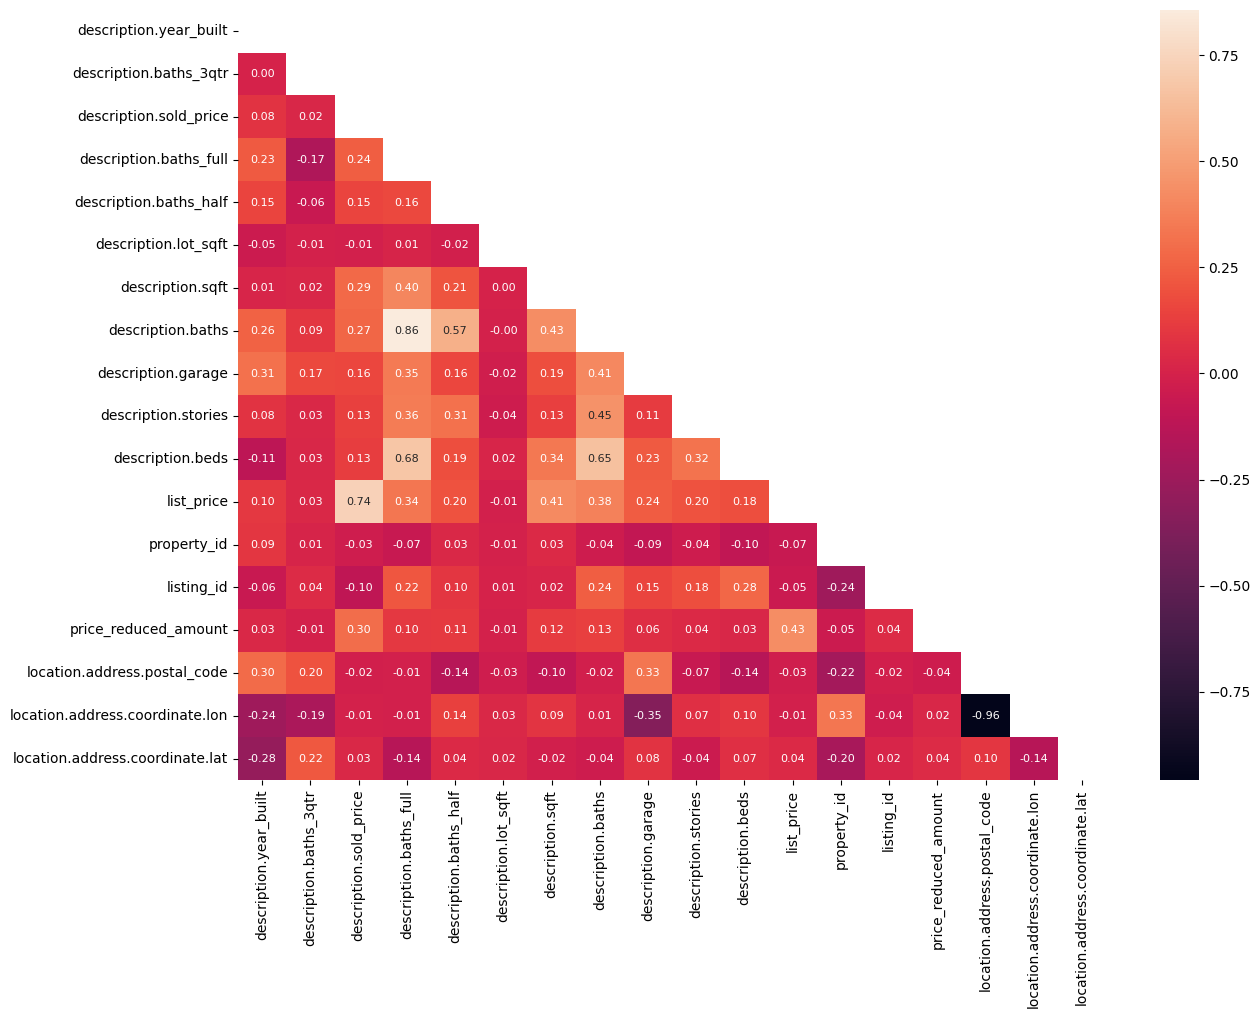

In [105]:
# Correlation heatmap of numerical
plt.figure(figsize=(14, 10))
sns.heatmap(
    housingData[numerical_cols].corr(),
    annot=True,
    annot_kws={'size':8},
    fmt=".2f",
    mask=np.triu(np.ones_like(housingData[numerical_cols].corr(), dtype=bool))
)

In [106]:
import matplotlib.pyplot as plt

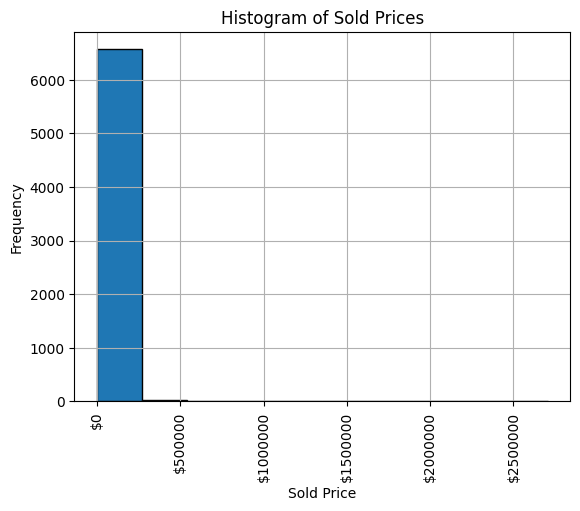

In [107]:
def millions(x, pos):
    'The two args are the value and tick position'
    return f'${int(x / 10)}'

# Create the histogram
fig, ax = plt.subplots()
housingData['description.sold_price'].hist(bins=10, edgecolor='black', ax=ax)

# Format the x-axis labels
ax.xaxis.set_major_formatter(FuncFormatter(millions))

plt.title('Histogram of Sold Prices')
plt.xlabel('Sold Price')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [108]:
housingData['description.sold_price'].describe()

count    6.597000e+03
mean     4.109031e+05
std      7.027501e+05
min      3.080000e+02
25%      1.900000e+05
50%      3.100000e+05
75%      4.700000e+05
max      2.706500e+07
Name: description.sold_price, dtype: float64

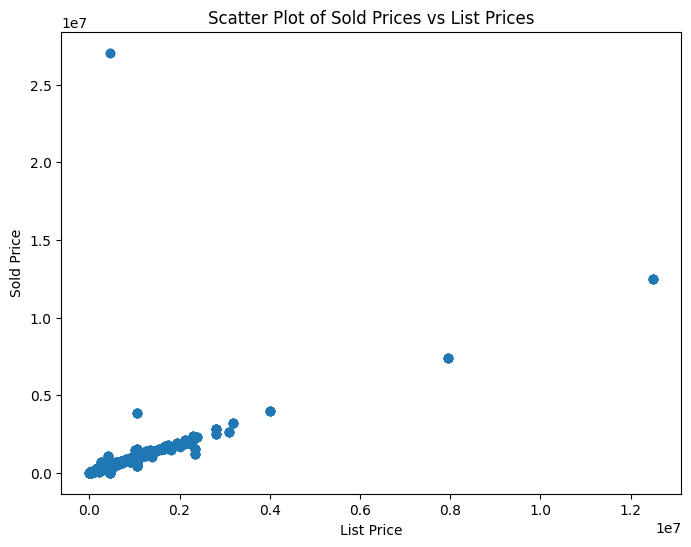

In [109]:
x= housingData['list_price']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs List Prices')
plt.xlabel('List Price')
plt.ylabel('Sold Price')
plt.show()

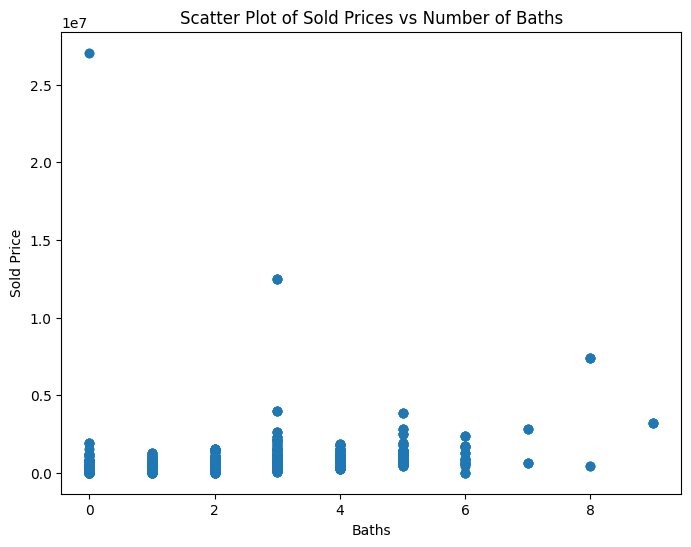

In [110]:
x= housingData['description.baths']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Number of Baths')
plt.xlabel('Baths')
plt.ylabel('Sold Price')
plt.show()

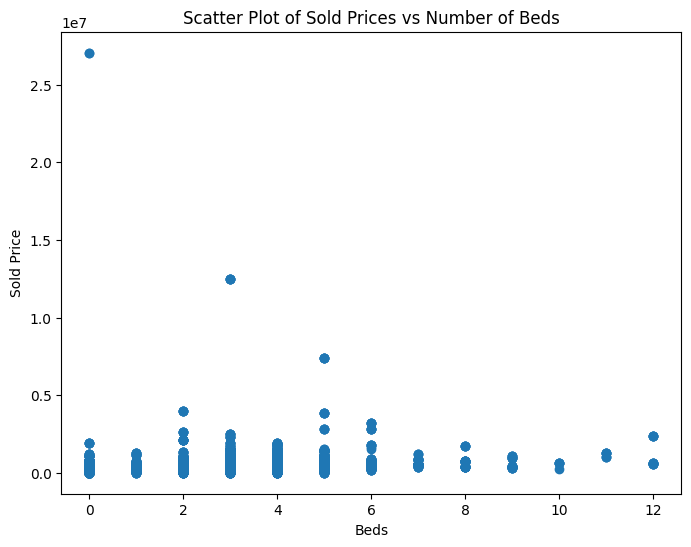

In [111]:
x= housingData['description.beds']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Number of Beds')
plt.xlabel('Beds')
plt.ylabel('Sold Price')
plt.show()

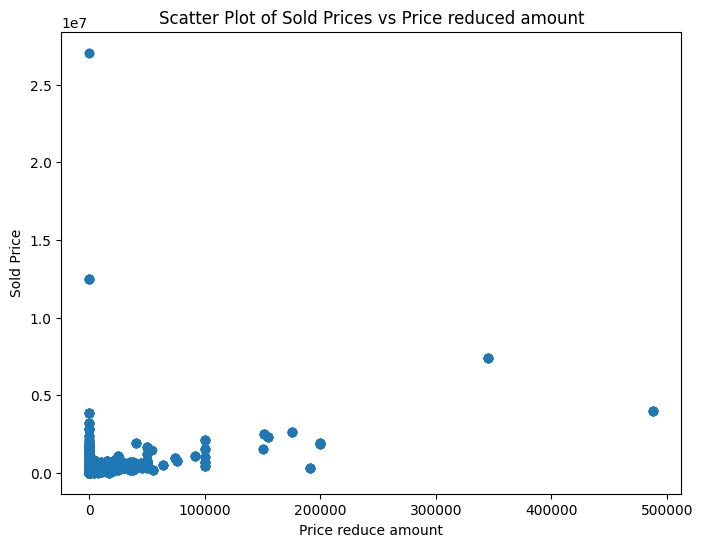

In [112]:
x= housingData['price_reduced_amount']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Price reduced amount')
plt.xlabel('Price reduce amount')
plt.ylabel('Sold Price')
plt.show()

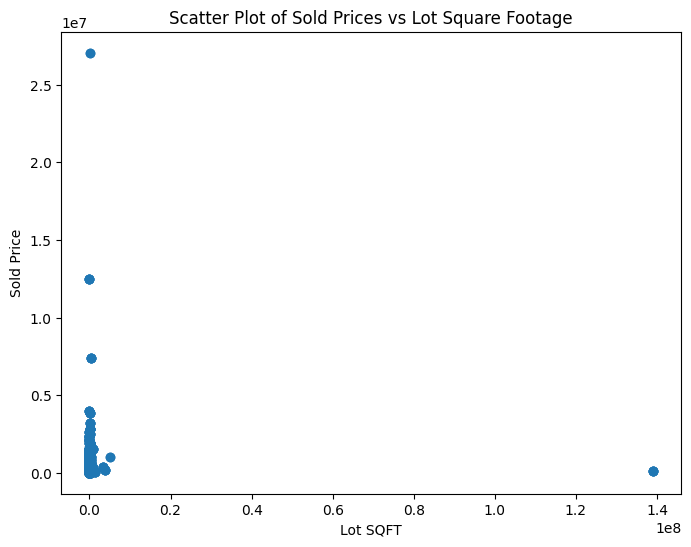

In [113]:
x= housingData['description.lot_sqft']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Lot Square Footage')
plt.xlabel('Lot SQFT')
plt.ylabel('Sold Price')
plt.show()

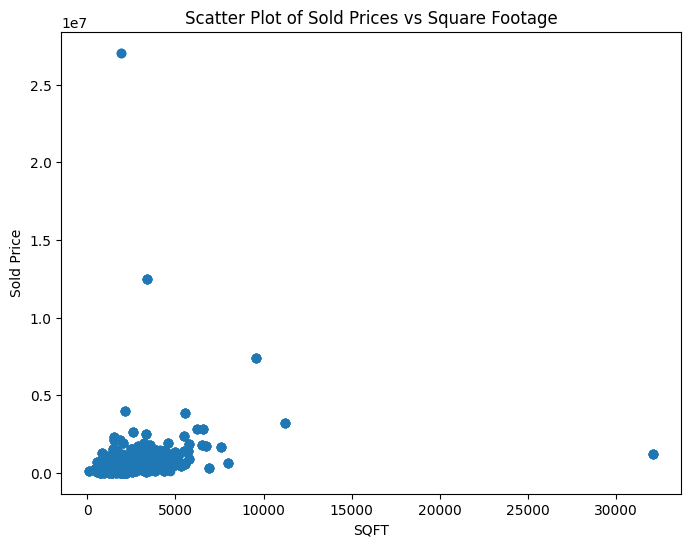

In [114]:
x= housingData['description.sqft']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Square Footage')
plt.xlabel('SQFT')
plt.ylabel('Sold Price')
plt.show()

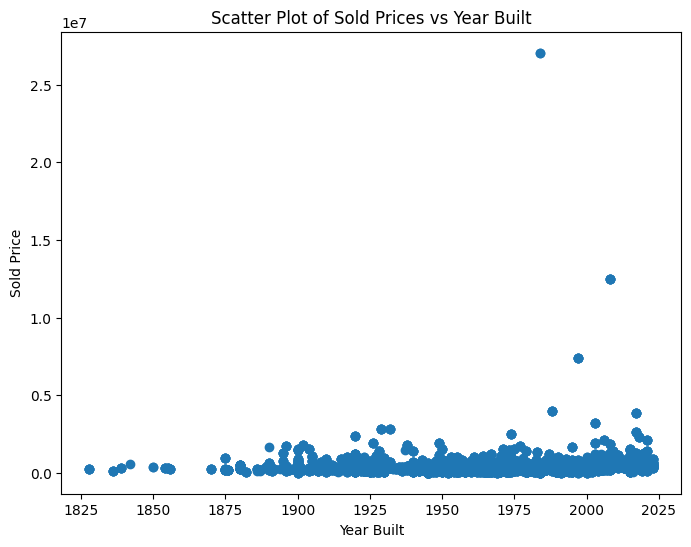

In [115]:
x= housingData['description.year_built']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sold Price')
plt.show()

In [116]:
# To remove target variable (sold price) from list of numerical columns
num_cols_without_sold_price = numerical_cols.copy()
num_cols_without_sold_price.remove('description.sold_price')

<Axes: >

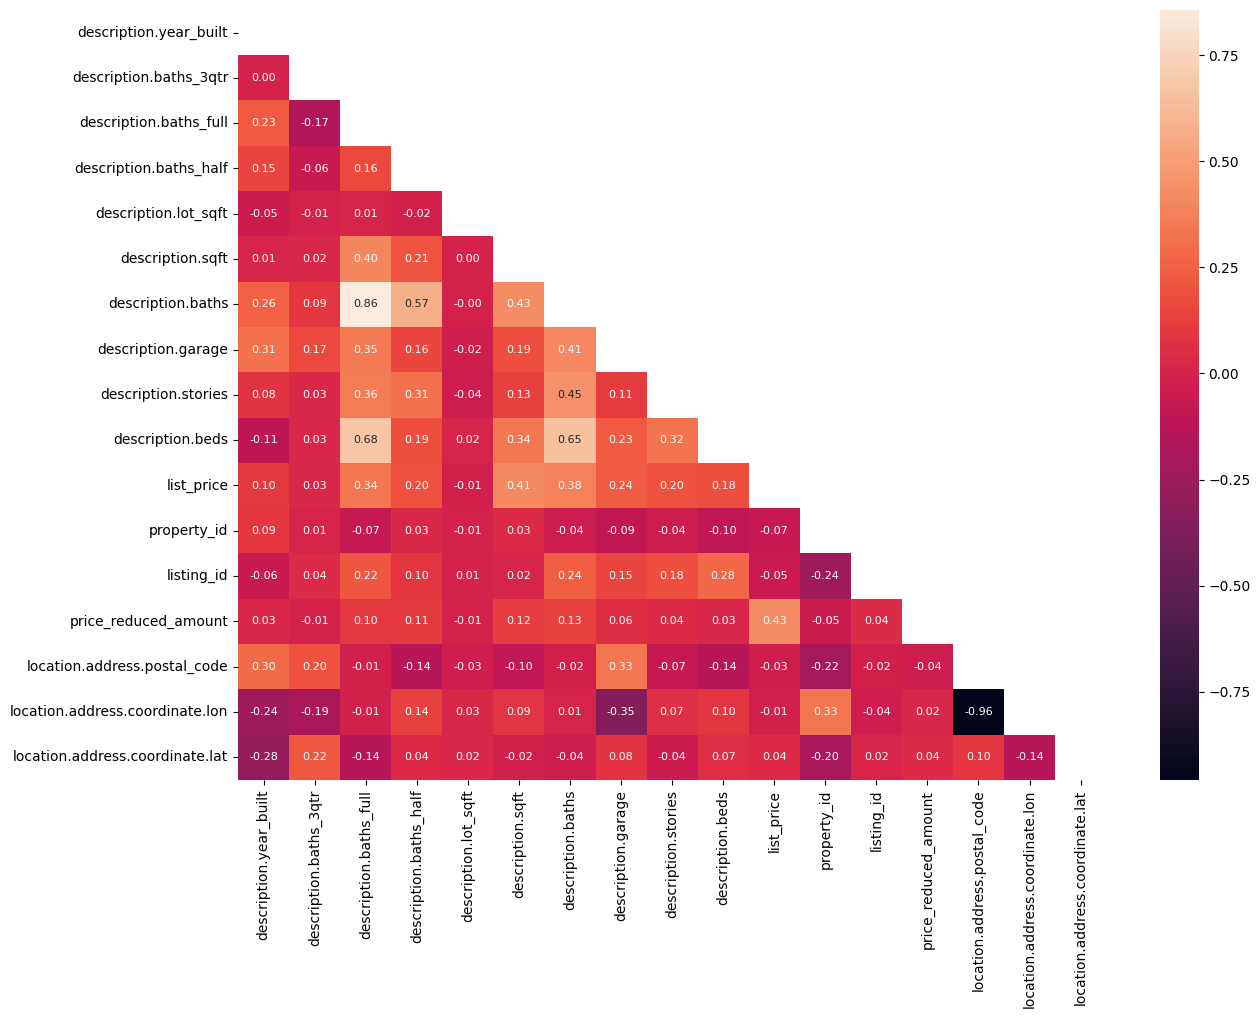

In [117]:
# To determine the correlation between numerical variables(less target variable) to detect highly correlated features that we may want to drop
plt.figure(figsize=(14, 10))
sns.heatmap(
    housingData[num_cols_without_sold_price].corr(),
    annot=True,
    annot_kws={'size':8},
    fmt=".2f",
    mask=np.triu(np.ones_like(housingData[num_cols_without_sold_price].corr(), dtype=bool)))

Description.baths is highly correlated with description.baths.full with a correlation of 0.86

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
_df.describe()

,description.year_built,description.baths_full,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,property_id,listing_id,price_reduced_amount,location.address.postal_code,location.address.coordinate.lon,location.address.coordinate.lat
count,3.472000e+03,3.472000e+03,3472.000000,3.472000e+03,3.472000e+03,3.472000e+03,3.472000e+03,3.472000e+03,3.472000e+03,3.472000e+03,3.472000e+03,3.472000e+03,3.472000e+03,3.472000e+03
mean,-5.712277e-16,-2.046494e-18,0.000000,-7.879002e-17,-7.060404e-17,-1.453011e-16,8.799924e-17,-5.423209e-17,1.821380e-16,2.251143e-16,2.046494e-18,-4.220894e-17,1.872542e-16,1.545103e-16
std,1.000144e+00,1.000144e+00,1.000144,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00,1.000144e+00
min,-4.042818e+00,-1.092027e+00,-0.153761,-1.471807e+00,-1.331756e+00,-1.046356e+00,-7.866723e-01,-3.096695e+00,-1.861649e+00,-4.379370e+00,-2.391570e-01,-1.623936e+00,-2.079681e+00,-2.080581e+00
25%,-6.168005e-01,-1.092027e+00,-0.117257,-6.301720e-01,-3.500455e-01,-1.046356e+00,-7.866723e-01,-2.630681e-01,-8.876065e-01,-9.992134e-02,-2.391570e-01,-8.859665e-01,-4.224041e-01,-7.695525e-01
50%,1.345191e-01,1.032812e-01,-0.094328,-2.404151e-01,-3.500455e-01,-1.628570e-01,5.022971e-01,-2.630681e-01,1.317290e-01,-9.748960e-02,-2.391570e-01,-8.283655e-02,3.072120e-01,1.217012e-01
75%,8.557859e-01,1.032812e-01,-0.061214,3.617544e-01,6.316654e-01,7.206421e-01,5.022971e-01,6.814743e-01,8.316685e-01,-9.625074e-02,-5.172429e-02,8.532691e-01,8.644323e-01,5.448669e-01
max,1.577053e+00,6.079820e+00,37.893489,9.297107e+00,6.521931e+00,6.905136e+00,1.081405e+01,8.237813e+00,1.849219e+00,1.088558e+01,1.805432e+01,1.744304e+00,1.286614e+00,2.118686e+00
